In [1]:
import os 
import sys 
import json 
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score

import matplotlib.pyplot as plt

sys.path.append("/Users/bobaebak/git/ai_text_detection")

from utils.file_helper import *
from utils.text_helper import *
from utils.plot_helper import *

In [4]:
# human data

# loads a tofel dataset
with open('../dataset/human/tofel.json', "r") as f:
    h_tofel_dataset = json.load(f)

# loads an arxiv dataset
with open('../dataset/human/arxiv.json', "r") as f:
    h_arxiv_dataset = json.load(f)

# loads student essay
with open('../dataset/human/student_essay.json', "r") as f:
    h_essay_dataset = json.load(f)

# loads student computer essay 
with open('../dataset/human/student_cs_essay.json', "r") as f:
    h_essay_cs_dataset = json.load(f)

In [6]:
# gpt data

# loads a tofel dataset
with open('../dataset/ai/gpt2medium_tofel.json', "r") as f:
    gpt_tofel_dataset = json.load(f)

# loads an arxiv dataset
with open('../dataset/ai/gpt2medium_arxiv.json', "r") as f:
    gpt_arxiv_dataset = json.load(f)

# loads student essay
with open('../dataset/ai/gpt2medium_essay.json', "r") as f:
    gpt_essay_dataset = json.load(f)

# loads student computer essay 
with open('../dataset/ai/gpt2medium_essay_cs.json', "r") as f:
    gpt_essay_cs_dataset = json.load(f)

# Tofel data distribution

In [8]:
h_tofel_dataset[:2]

[{'input': 'I prefer to cook at home. First of all, it is cheaper and safer than the restaurant. Because I can buy the things needed for cooking, and I can make sure that they are clean and fresh. Second, making a good dinner helps me obtain a sense of achievement. On every Spring festival, I always make dinner for my whole family, they always think that the meal is delicious and we can chat freely around the table. I am really proud of it and I think it can improve the relationship between my family and me.',
  'label': 'human'},
 {'input': 'The place I would like to visit most is the outer space，the place where most of the physical laws on the earth do not apply. It is interesting to see everything floating in the air. And the term “in the air” should also be modified simply because there is no air anyway. It is interesting to walk the distance in a whole new style. And it is interesting to see the mother planet from a whole new angle. This big blue crystal sphere，from the pictures t

In [9]:
gpt_tofel_dataset[:2]

[{'input': 'I prefer to cook at home. First of all, it is cheaper and safer than the restaurant. Because I can buy the things needed for cooking, I can cook more often. I also like to cook in the kitchen, because I can cook more quickly.\n\nI also like to cook in the kitchen, because I can cook more quickly. I like to cook in the kitchen, because I can cook more quickly. I like to cook in the kitchen, because I can cook more quickly. I like to cook in the kitchen, because I can cook more quickly. I like to cook in the kitchen, because I can cook more quickly. I like to cook in the kitchen, because I can cook more quickly. I like to cook in the kitchen, because I can cook more quickly. I like to cook in the kitchen, because I can cook more quickly. I like to cook in the kitchen, because I can cook more quickly. I like to cook in the kitchen, because I',
  'label': 'ai'},
 {'input': 'The place I would like to visit most is the outer space，the place where most of the physical laws on the 

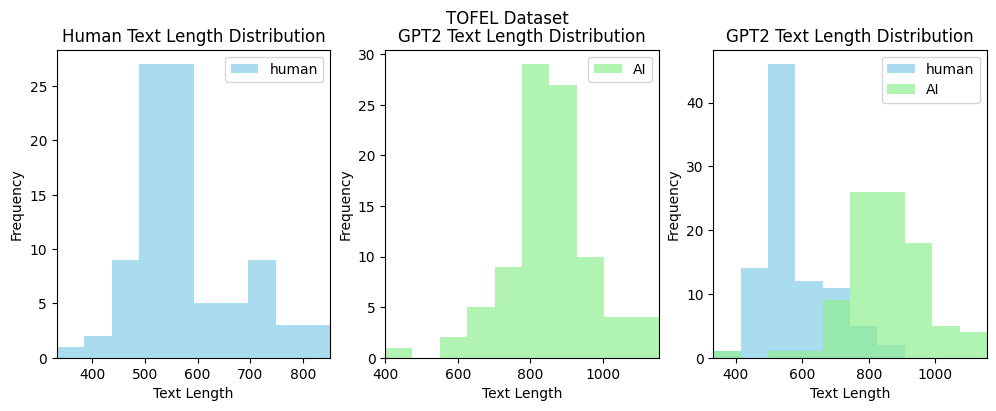

In [58]:
h_x = [len(item['input']) for item in h_tofel_dataset]
m_x = [len(item['input']) for item in gpt_tofel_dataset]

plot_helper = PlotHelper(
    row=1, col=3, figsize=(12,4), title="TOFEL Dataset",
    plots=[
        PlotItem(ptype="hist", xlabel="Text Length", ylabel="Frequency", title="Human Text Length Distribution", 
                 xlim=(min(h_x), max(h_x)), 
                 x=[h_x], 
                 args=[{"bins": np.linspace(min(h_x), max(h_x), 11), "color": "skyblue", "alpha":0.7, "label": "human"}]
        ),
        PlotItem(ptype="hist", xlabel="Text Length", ylabel="Frequency", title="GPT2 Text Length Distribution", 
                 xlim=(min(m_x), max(m_x)),
                 x=[m_x], 
                 args=[{"bins": np.linspace(min(m_x), max(m_x), 11), "color": "lightgreen", "alpha":0.7, "label": "AI"}]
        ),
        PlotItem(ptype="hist", xlabel="Text Length", ylabel="Frequency", title="GPT2 Text Length Distribution", 
                 xlim=(min(h_x), max(m_x)),
                 x=[h_x, m_x], 
                 args=[{"bins": np.linspace(min(h_x), max(m_x), 11), "color": "skyblue", "alpha":0.7, "label": "human"}, {"bins": np.linspace(min(h_x), max(m_x), 11), "color": "lightgreen", "alpha":0.7, "label": "AI"}]
        ),
    ]
)
_ = draws(plot_helper)

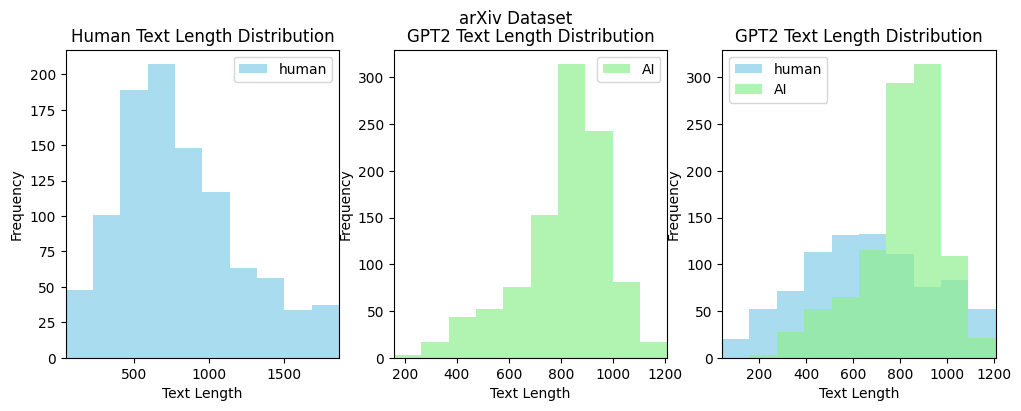

In [59]:
h_x = [len(item['input']) for item in h_arxiv_dataset]
m_x = [len(item['input']) for item in gpt_arxiv_dataset]

plot_helper = PlotHelper(
    row=1, col=3, figsize=(12,4), title="arXiv Dataset",
    plots=[
        PlotItem(ptype="hist", xlabel="Text Length", ylabel="Frequency", title="Human Text Length Distribution", 
                 xlim=(min(h_x), max(h_x)), 
                 x=[h_x], 
                 args=[{"bins": np.linspace(min(h_x), max(h_x), 11), "color": "skyblue", "alpha":0.7, "label": "human"}]
        ),
        PlotItem(ptype="hist", xlabel="Text Length", ylabel="Frequency", title="GPT2 Text Length Distribution", 
                 xlim=(min(m_x), max(m_x)),
                 x=[m_x], 
                 args=[{"bins": np.linspace(min(m_x), max(m_x), 11), "color": "lightgreen", "alpha":0.7, "label": "AI"}]
        ),
        PlotItem(ptype="hist", xlabel="Text Length", ylabel="Frequency", title="GPT2 Text Length Distribution", 
                 xlim=(min(h_x), max(m_x)),
                 x=[h_x, m_x], 
                 args=[{"bins": np.linspace(min(h_x), max(m_x), 11), "color": "skyblue", "alpha":0.7, "label": "human"}, {"bins": np.linspace(min(h_x), max(m_x), 11), "color": "lightgreen", "alpha":0.7, "label": "AI"}]
        ),
    ]
)
_ = draws(plot_helper)

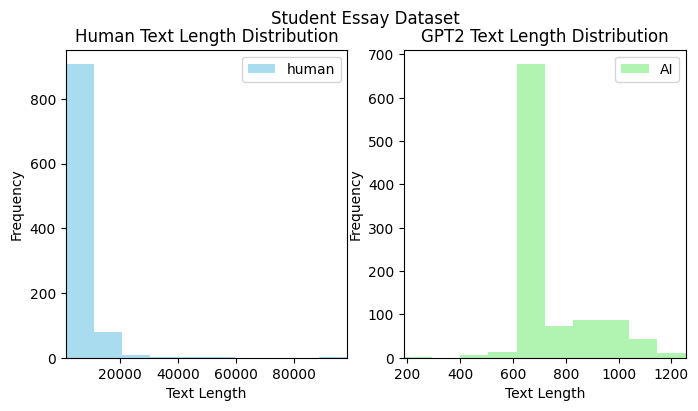

In [74]:
h_x = [len(item['input']) for item in h_essay_dataset]
m_x = [len(item['input']) for item in gpt_essay_dataset]

plot_helper = PlotHelper(
    row=1, col=2, figsize=(8,4), title="Student Essay Dataset",
    plots=[
        PlotItem(ptype="hist", xlabel="Text Length", ylabel="Frequency", title="Human Text Length Distribution", 
                 xlim=(min(h_x), max(h_x)), 
                 x=[h_x], 
                 args=[{"bins": np.linspace(min(h_x), max(h_x), 11), "color": "skyblue", "alpha":0.7, "label": "human"}]
        ),
        PlotItem(ptype="hist", xlabel="Text Length", ylabel="Frequency", title="GPT2 Text Length Distribution", 
                 xlim=(min(m_x), max(m_x)),
                 x=[m_x], 
                 args=[{"bins": np.linspace(min(m_x), max(m_x), 11), "color": "lightgreen", "alpha":0.7, "label": "AI"}]
        ),
        # PlotItem(ptype="hist", xlabel="Text Length", ylabel="Frequency", title="GPT2 Text Length Distribution", 
        #          xlim=(min(m_x), 20000),
        #          x=[h_x, m_x], 
        #          args=[{"bins": np.linspace(min(m_x), 20000, 11), "color": "skyblue", "alpha":0.7, "label": "human"}, {"bins": np.linspace(min(h_x), max(m_x), 11), "color": "lightgreen", "alpha":0.7, "label": "AI"}]
        # ),
    ]
)
_ = draws(plot_helper)

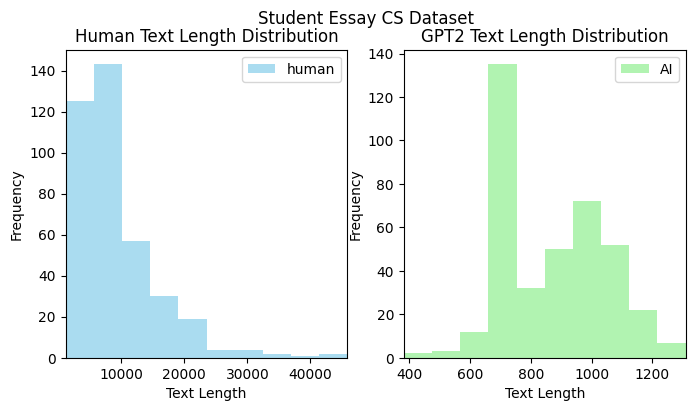

In [70]:
h_x = [len(item['input']) for item in h_essay_cs_dataset]
m_x = [len(item['input']) for item in gpt_essay_cs_dataset]

plot_helper = PlotHelper(
    row=1, col=2, figsize=(8,4), title="Student Essay CS Dataset",
    plots=[
        PlotItem(ptype="hist", xlabel="Text Length", ylabel="Frequency", title="Human Text Length Distribution", 
                 xlim=(min(h_x), max(h_x)), 
                 x=[h_x], 
                 args=[{"bins": np.linspace(min(h_x), max(h_x), 11), "color": "skyblue", "alpha":0.7, "label": "human"}]
        ),
        PlotItem(ptype="hist", xlabel="Text Length", ylabel="Frequency", title="GPT2 Text Length Distribution", 
                 xlim=(min(m_x), max(m_x)),
                 x=[m_x], 
                 args=[{"bins": np.linspace(min(m_x), max(m_x), 11), "color": "lightgreen", "alpha":0.7, "label": "AI"}]
        ),
        # PlotItem(ptype="hist", xlabel="Text Length", ylabel="Frequency", title="GPT2 Text Length Distribution", 
        #          xlim=(min(h_x), max(m_x)),
        #          x=[h_x, m_x], 
        #          args=[{"bins": np.linspace(min(m_x), 20000, 11), "color": "skyblue", "alpha":0.7, "label": "human"}, {"bins": np.linspace(min(m_x), 20000, 11), "color": "lightgreen", "alpha":0.7, "label": "AI"}]
        # ),
    ]
)
_ = draws(plot_helper)

# Evaluation

### OpenAI Detector

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy: 0.53


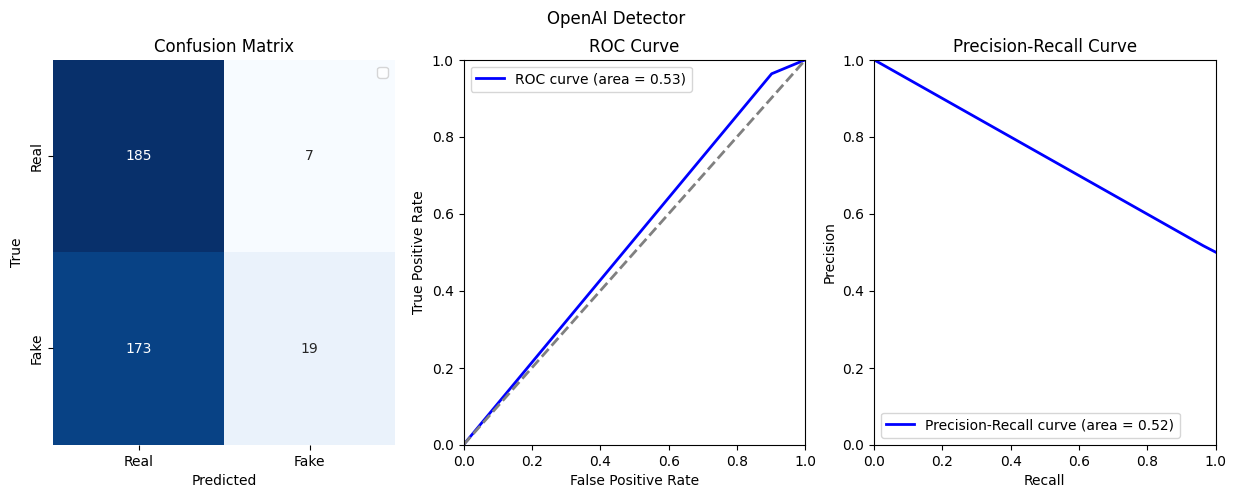

In [12]:
# Load the datasets
with open('../dataset/eval/h_openai_eval.json', "r") as f:
    eval_openai_detector = json.load(f)
    for item in eval_openai_detector:
        item['label'] = 'Real'

with open('../dataset/eval/m_openai_eval.json', "r") as f:
    eval_openai_detector.extend(json.load(f))
    for item in eval_openai_detector:
        if "label" not in item:
            item['label'] = 'Fake'

true_labels = [item['label'] for item in eval_openai_detector]
predicted_labels = []
for prob in eval_openai_detector:
    fake_prob = float(prob['Fake'])
    real_prob = float(prob['Real'])
    if real_prob > fake_prob:
        predicted_labels.append('Real')
    else:
        predicted_labels.append('Fake')

# calculate Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=['Real', 'Fake'])

# calculate ROC Curve
true_binary = [1 if label == 'Real' else 0 for label in true_labels]
predicted_binary = [1 if label == 'Real' else 0 for label in predicted_labels]
fpr, tpr, thresholds = roc_curve(true_binary, predicted_binary)
roc_auc = auc(fpr, tpr)

# calculate Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(true_binary, predicted_binary)
average_precision = average_precision_score(true_binary, predicted_binary)

#### Plot both confusion matrices side by side
helper = PlotHelper(
    col=3, figsize=(15, 5), title="OpenAI Detector",
    plots=[
        PlotItem(
            ptype="heatmap", xlabel='Predicted', ylabel='True', title='Confusion Matrix',
            x=[conf_matrix],
            args=[{"annot": True, "fmt":'d', "cbar":False, "cmap":'Blues', "xticklabels":['Real', 'Fake'], "yticklabels":['Real', 'Fake']}],
        ),
        PlotItem(
            ptype="plot", xlabel="False Positive Rate", ylabel="True Positive Rate", title="ROC Curve",
            xlim=(0.0, 1.0), ylim=(0.0, 1.0),
            x=[fpr, [0,1]],
            y=[tpr, [0,1]],
            args=[{"color":"blue", "lw":2, "label":'ROC curve (area = %0.2f)' % roc_auc}, {"color": "grey", "lw":2, "linestyle": "--"}]
        ),
        PlotItem(
            ptype="plot", xlabel="Recall", ylabel="Precision", title="Precision-Recall Curve",
            xlim=(0.0, 1.0), ylim=(0.0, 1.0),
            x=[recall, [1,1]],
            y=[precision, [1,1]],
            args=[{"color":"blue", "lw":2, "label":'Precision-Recall curve (area = %0.2f)' % average_precision}, {"color": "grey", "lw":2, "linestyle": "--"}]
        ),
    ]
)

draws(helper)

# Sum the diagonal elements (true positives + true negatives)
correct_predictions = np.trace(conf_matrix)

# Sum all elements in the confusion matrix
total_predictions = np.sum(conf_matrix)

# Calculate accuracy
accuracy = correct_predictions / total_predictions

print(f"Accuracy: {accuracy:.2f}")

### OpenAI Fine-tuned Detector

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy: 0.94


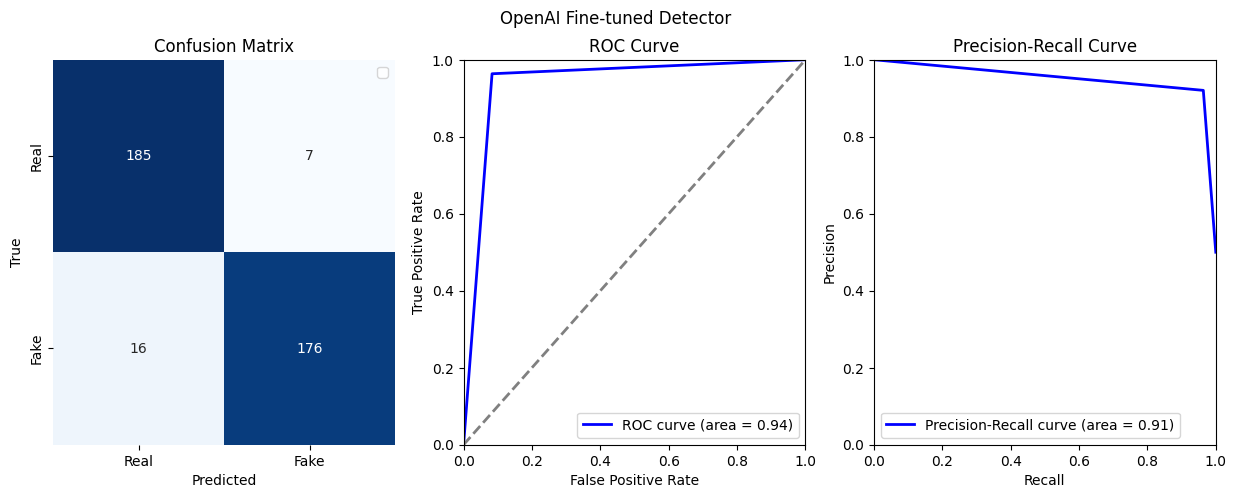

In [13]:
# Load the datasets
with open('../dataset/eval/h_openai_finetuned_eval.json', "r") as f:
    eval_openai_detector = json.load(f)
    for item in eval_openai_detector:
        item['label'] = 'Real'

with open('../dataset/eval/m_openai_finetuned_eval.json', "r") as f:
    eval_openai_detector.extend(json.load(f))
    for item in eval_openai_detector:
        if "label" not in item:
            item['label'] = 'Fake'

true_labels = [item['label'] for item in eval_openai_detector]
predicted_labels = []
for prob in eval_openai_detector:
    fake_prob = float(prob['Fake'])
    real_prob = float(prob['Real'])
    if real_prob > fake_prob:
        predicted_labels.append('Real')
    else:
        predicted_labels.append('Fake')

# calculate Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=['Real', 'Fake'])

# calculate ROC Curve
true_binary = [1 if label == 'Real' else 0 for label in true_labels]
predicted_binary = [1 if label == 'Real' else 0 for label in predicted_labels]
fpr, tpr, thresholds = roc_curve(true_binary, predicted_binary)
roc_auc = auc(fpr, tpr)

# calculate Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(true_binary, predicted_binary)
average_precision = average_precision_score(true_binary, predicted_binary)

#### Plot both confusion matrices side by side
helper = PlotHelper(
    col=3, figsize=(15, 5), title="OpenAI Fine-tuned Detector",
    plots=[
        PlotItem(
            ptype="heatmap", xlabel='Predicted', ylabel='True', title='Confusion Matrix',
            x=[conf_matrix],
            args=[{"annot": True, "fmt":'d', "cbar":False, "cmap":'Blues', "xticklabels":['Real', 'Fake'], "yticklabels":['Real', 'Fake']}],
        ),
        PlotItem(
            ptype="plot", xlabel="False Positive Rate", ylabel="True Positive Rate", title="ROC Curve",
            xlim=(0.0, 1.0), ylim=(0.0, 1.0),
            x=[fpr, [0,1]],
            y=[tpr, [0,1]],
            args=[{"color":"blue", "lw":2, "label":'ROC curve (area = %0.2f)' % roc_auc}, {"color": "grey", "lw":2, "linestyle": "--"}]
        ),
        PlotItem(
            ptype="plot", xlabel="Recall", ylabel="Precision", title="Precision-Recall Curve",
            xlim=(0.0, 1.0), ylim=(0.0, 1.0),
            x=[recall, [1,1]],
            y=[precision, [1,1]],
            args=[{"color":"blue", "lw":2, "label":'Precision-Recall curve (area = %0.2f)' % average_precision}, {"color": "grey", "lw":2, "linestyle": "--"}]
        ),
    ]
)

draws(helper)

# Sum the diagonal elements (true positives + true negatives)
correct_predictions = np.trace(conf_matrix)

# Sum all elements in the confusion matrix
total_predictions = np.sum(conf_matrix)

# Calculate accuracy
accuracy = correct_predictions / total_predictions

print(f"Accuracy: {accuracy:.2f}")

### RADAR Detector

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy: 0.51


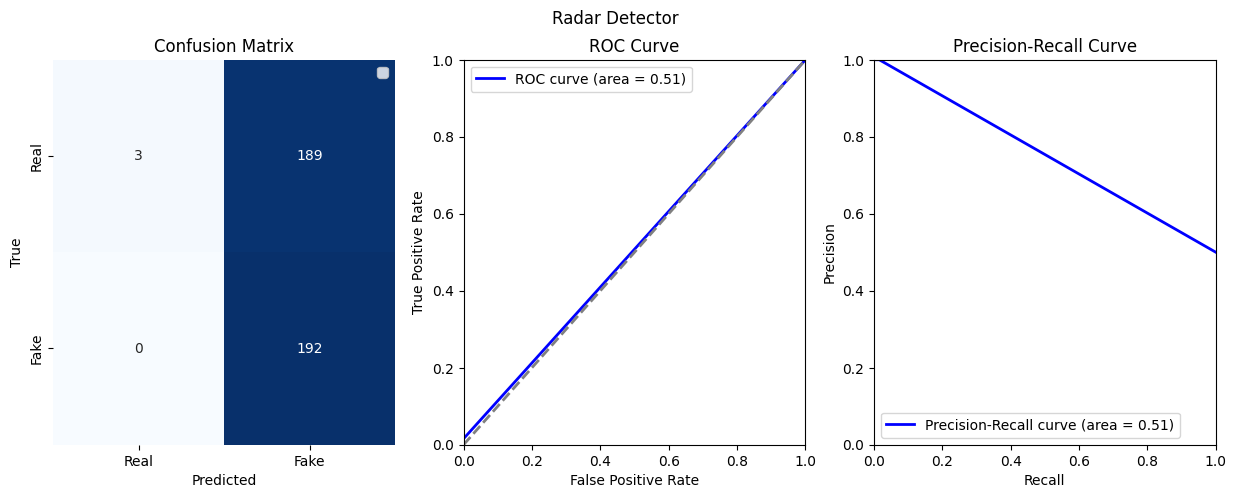

In [14]:
# Load the datasets
with open('../dataset/eval/h_radar_eval.json', "r") as f:
    eval_radar = json.load(f)
    for item in eval_radar:
        item['label'] = 'Real'

with open('../dataset/eval/m_radar_eval.json', "r") as f:
    eval_radar.extend(json.load(f))
    for item in eval_radar:
        if "label" not in item:
            item['label'] = 'Fake'

# Process the first dataset
true_labels = [item['label'] for item in eval_radar]
predicted_labels = []
for prob in eval_radar:
    fake_prob = float(prob['Fake'])
    real_prob = float(prob['Real'])
    if real_prob > fake_prob:
        predicted_labels.append('Real')
    else:
        predicted_labels.append('Fake')

# calculate Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=['Real', 'Fake'])

# calculate ROC Curve
true_binary = [1 if label == 'Real' else 0 for label in true_labels]
predicted_binary = [1 if label == 'Real' else 0 for label in predicted_labels]
fpr, tpr, thresholds = roc_curve(true_binary, predicted_binary)
roc_auc = auc(fpr, tpr)

# calculate Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(true_binary, predicted_binary)
average_precision = average_precision_score(true_binary, predicted_binary)

#### Plot both confusion matrices side by side
helper = PlotHelper(
    col=3, figsize=(15, 5), title="Radar Detector",
    plots=[
        PlotItem(
            ptype="heatmap", xlabel='Predicted', ylabel='True', title='Confusion Matrix',
            x=[conf_matrix],
            args=[{"annot": True, "fmt":'d', "cbar":False, "cmap":'Blues', "xticklabels":['Real', 'Fake'], "yticklabels":['Real', 'Fake']}],
        ),
        PlotItem(
            ptype="plot", xlabel="False Positive Rate", ylabel="True Positive Rate", title="ROC Curve",
            xlim=(0.0, 1.0), ylim=(0.0, 1.0),
            x=[fpr, [0,1]],
            y=[tpr, [0,1]],
            args=[{"color":"blue", "lw":2, "label":'ROC curve (area = %0.2f)' % roc_auc}, {"color": "grey", "lw":2, "linestyle": "--"}]
        ),
        PlotItem(
            ptype="plot", xlabel="Recall", ylabel="Precision", title="Precision-Recall Curve",
            xlim=(0.0, 1.0), ylim=(0.0, 1.0),
            x=[recall, [1,1]],
            y=[precision, [1,1]],
            args=[{"color":"blue", "lw":2, "label":'Precision-Recall curve (area = %0.2f)' % average_precision}, {"color": "grey", "lw":2, "linestyle": "--"}]
        ),
    ]
)

draws(helper)

# Sum the diagonal elements (true positives + true negatives)
correct_predictions = np.trace(conf_matrix)

# Sum all elements in the confusion matrix
total_predictions = np.sum(conf_matrix)

# Calculate accuracy
accuracy = correct_predictions / total_predictions

print(f"Accuracy: {accuracy:.2f}")

### GPTZero Detector

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy: 0.74


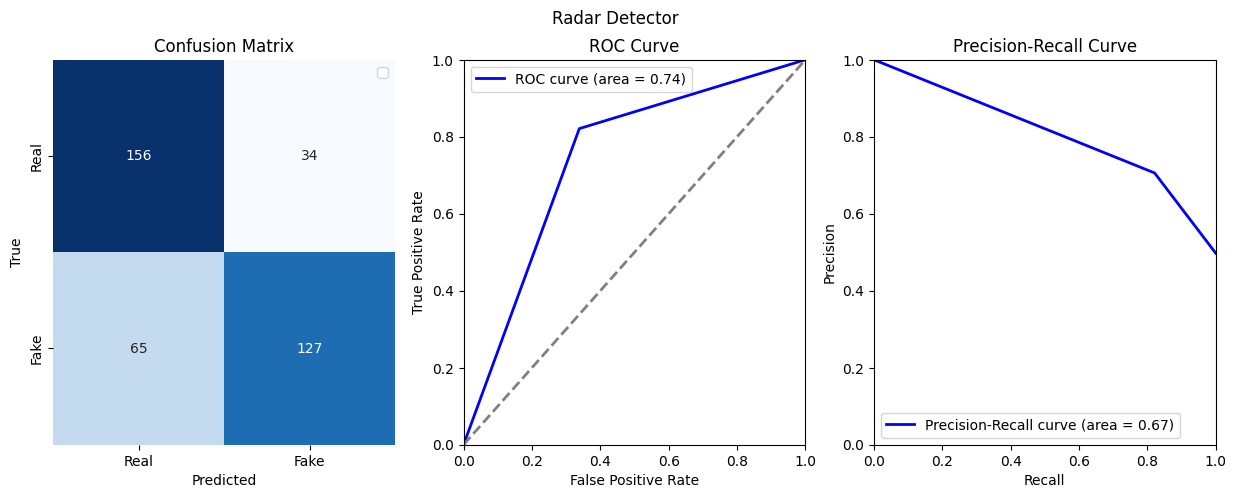

In [27]:
# Load the datasets
with open('../dataset/eval/h_gptzero_eval.json', "r") as f:
    eval_gptzero = json.load(f)
    for item in eval_gptzero:
        item['rlabel'] = 'Real'
        
with open('../dataset/eval/m_gptzero_eval.json', "r") as f:
    eval_gptzero.extend(json.load(f))
    for item in eval_gptzero:
        if "rlabel" not in item:
            item['rlabel'] = 'Fake'

# Process the first dataset
true_labels = [item['rlabel'] for item in eval_gptzero]
predicted_labels = []
for prob in eval_gptzero:
    if prob['label'] == 1:
        predicted_labels.append('Real')
    else:
        predicted_labels.append('Fake')

# calculate Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=['Real', 'Fake'])

# calculate ROC Curve
true_binary = [1 if label == 'Real' else 0 for label in true_labels]
predicted_binary = [item['label'] for item in eval_gptzero]
fpr, tpr, thresholds = roc_curve(true_binary, predicted_binary)
roc_auc = auc(fpr, tpr)

# calculate Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(true_binary, predicted_binary)
average_precision = average_precision_score(true_binary, predicted_binary)

#### Plot both confusion matrices side by side
helper = PlotHelper(
    col=3, figsize=(15, 5), title="Radar Detector",
    plots=[
        PlotItem(
            ptype="heatmap", xlabel='Predicted', ylabel='True', title='Confusion Matrix',
            x=[conf_matrix],
            args=[{"annot": True, "fmt":'d', "cbar":False, "cmap":'Blues', "xticklabels":['Real', 'Fake'], "yticklabels":['Real', 'Fake']}],
        ),
        PlotItem(
            ptype="plot", xlabel="False Positive Rate", ylabel="True Positive Rate", title="ROC Curve",
            xlim=(0.0, 1.0), ylim=(0.0, 1.0),
            x=[fpr, [0,1]],
            y=[tpr, [0,1]],
            args=[{"color":"blue", "lw":2, "label":'ROC curve (area = %0.2f)' % roc_auc}, {"color": "grey", "lw":2, "linestyle": "--"}]
        ),
        PlotItem(
            ptype="plot", xlabel="Recall", ylabel="Precision", title="Precision-Recall Curve",
            xlim=(0.0, 1.0), ylim=(0.0, 1.0),
            x=[recall, [1,1]],
            y=[precision, [1,1]],
            args=[{"color":"blue", "lw":2, "label":'Precision-Recall curve (area = %0.2f)' % average_precision}, {"color": "grey", "lw":2, "linestyle": "--"}]
        ),
    ]
)

draws(helper)

# Sum the diagonal elements (true positives + true negatives)
correct_predictions = np.trace(conf_matrix)

# Sum all elements in the confusion matrix
total_predictions = np.sum(conf_matrix)

# Calculate accuracy
accuracy = correct_predictions / total_predictions

print(f"Accuracy: {accuracy:.2f}")

### DetectGPT